In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sea 
import numpy as np 

In [3]:
df = pd.read_csv("../data/dataset.csv")
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [4]:
df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [5]:
df = df.drop_duplicates()
df.shape

(9700, 11)

In [6]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst=True)
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [7]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [8]:
#Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

#filtrar por categoria office supplies
df_categoria = df[df["Categoria"] == 'Office Supplies']
#agrupar por cidade e somar as vendas pelo filtro
df_total = df_categoria.groupby("Cidade")['Valor_Venda'].sum()
#encontrar cidade com maior venda com um dos 2
df_maior_venda = df_total.idxmax()
df_total.sort_values(ascending=False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

In [9]:
#Qual o Total de Vendas Por Data do Pedido?
#Demonstre o resultado através de um gráfico de barras.
total_vendas_data = df.groupby('Data_Pedido')['Valor_Venda'].sum()
total_vendas_data


Data_Pedido
2015-01-03      16.4480
2015-01-04     288.0600
2015-01-05      19.5360
2015-01-06    4407.1000
2015-01-07      87.1580
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: Valor_Venda, Length: 1226, dtype: float64

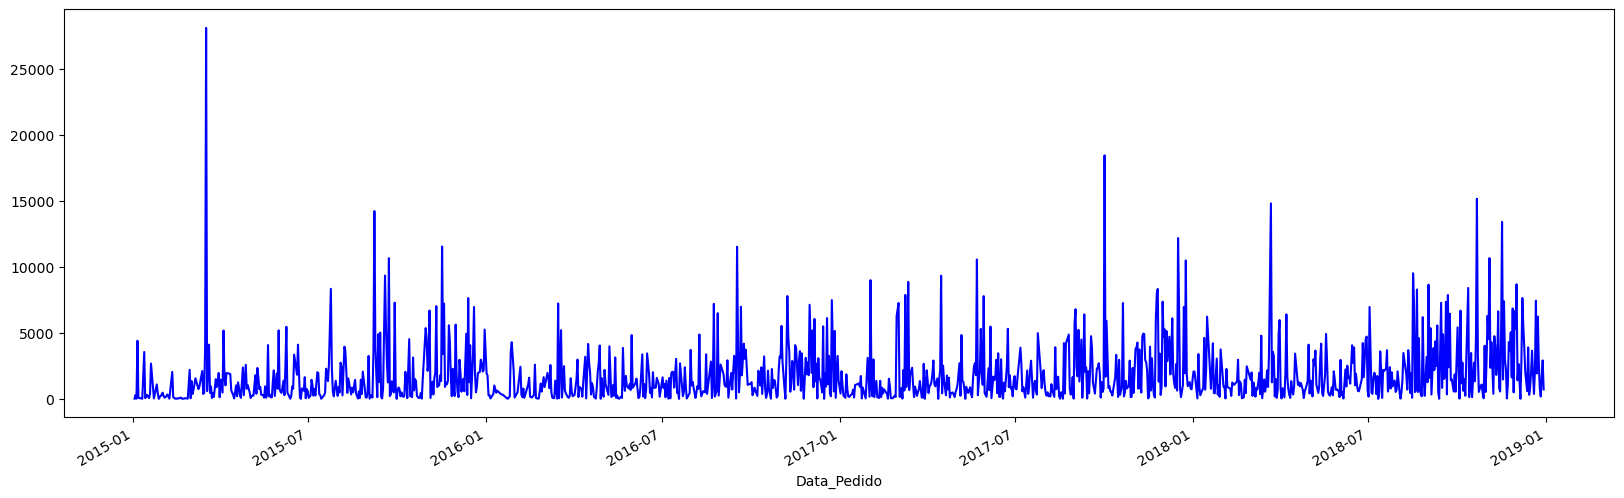

In [10]:
plt.figure(figsize=(20, 6))
total_vendas_data.plot(x ='Data_Pedido', y ='Valor_Venda', color = 'blue')
plt.show()

In [11]:
#Qual o Total de Vendas por Estado?
#Demonstre o resultado através de um gráfico de barras.
estado_total = df.groupby('Estado')['Valor_Venda'].sum().reset_index()
estado_total

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980
5,Connecticut,13366.7370
6,Delaware,26452.5890
7,District of Columbia,2865.0200
8,Florida,88043.7000
9,Georgia,48083.1600


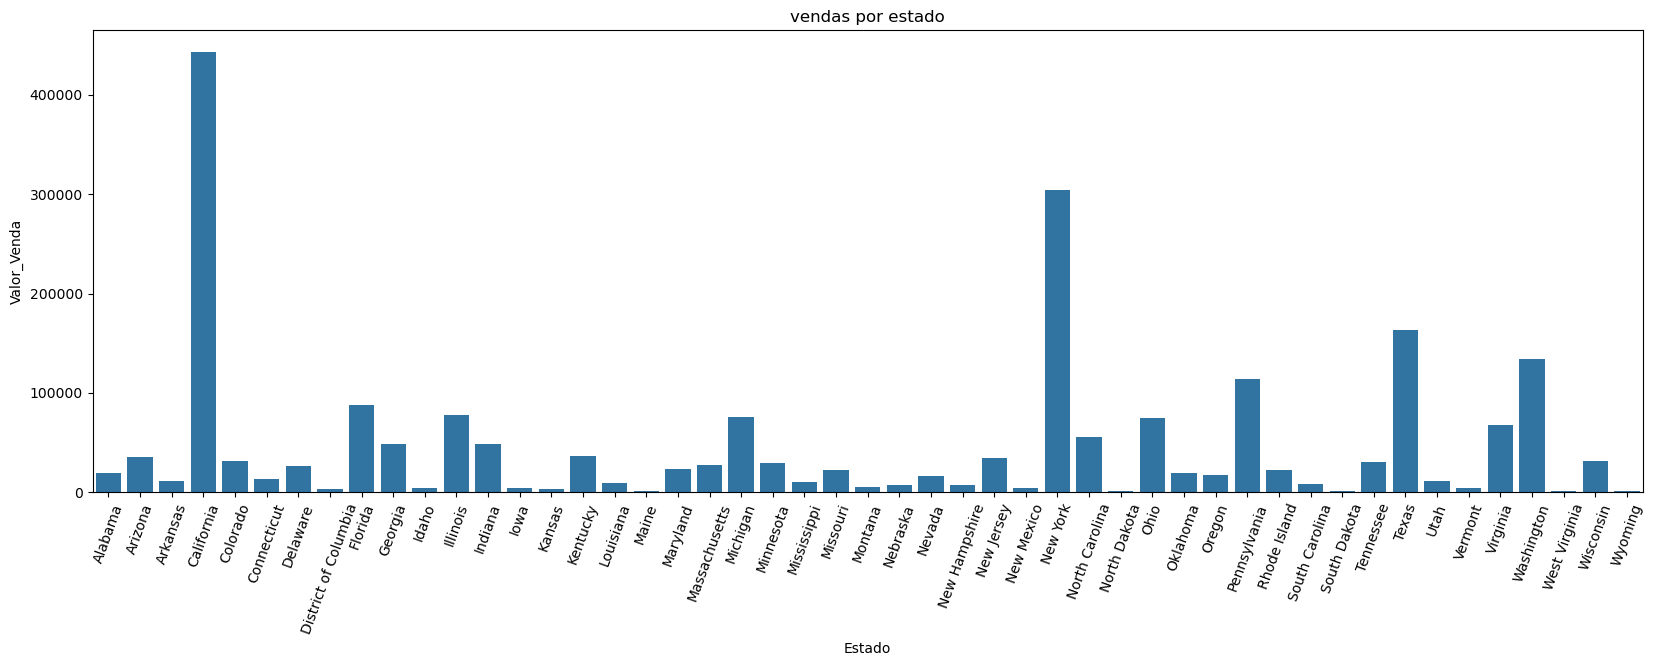

In [12]:
plt.figure(figsize=(20,6))
sea.barplot(data = estado_total, y='Valor_Venda', x='Estado').set(title= 'vendas por estado')
plt.xticks(rotation= 70)
plt.show()

In [13]:
#Quais São as 10 Cidades com Maior Total de Vendas?
#Demonstre o resultado através de um gráfico de barras.

Cidade_total_10 = df.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).head(10).reset_index()
Cidade_total_10

,Cidade,Valor_Venda
0,New York City,251749.2190
1,Los Angeles,171654.6330
2,Seattle,114725.4780
3,San Francisco,107489.9520
4,Philadelphia,107197.8030
5,Houston,61590.1868
6,San Diego,47458.3790
7,Chicago,46974.3430
8,Jacksonville,44713.1830
9,Detroit,42446.9440


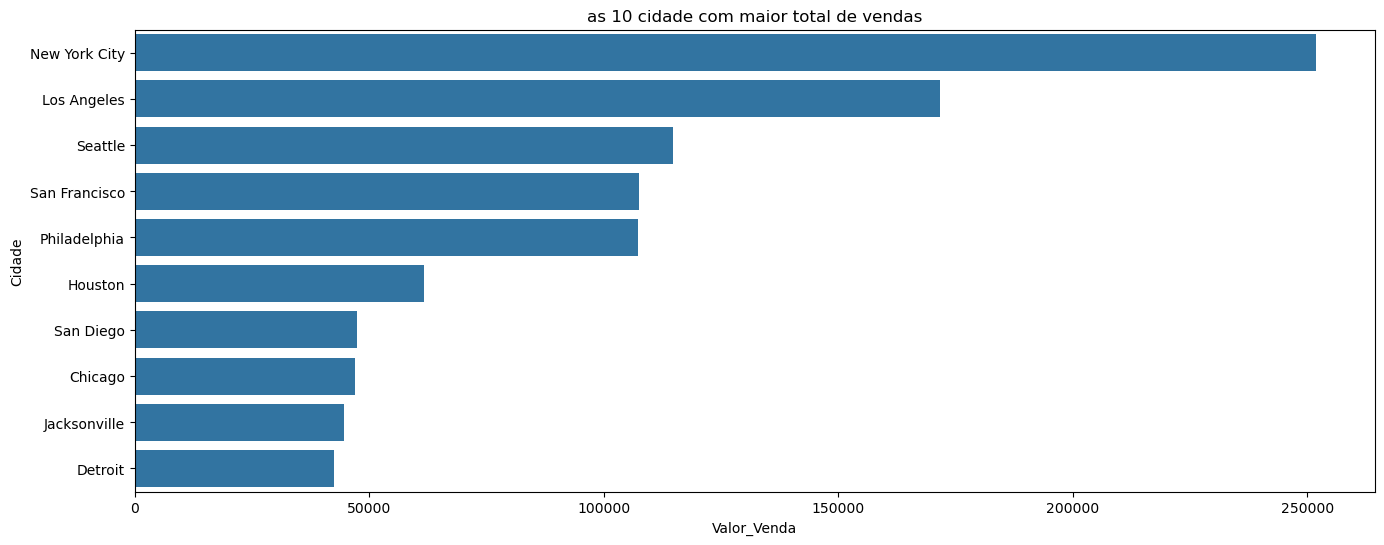

In [14]:
plt.figure(figsize=(16,6))
sea.barplot(data = Cidade_total_10, x='Valor_Venda', y='Cidade').set(title='as 10 cidade com maior total de vendas')
plt.show()

In [15]:
#Qual Segmento Teve o Maior Total de Vendas?
#Demonstre o resultado através de um gráfico de pizza.
Segmento_maior_total = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()
Segmento_maior_total

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [16]:
#formatando a saida
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

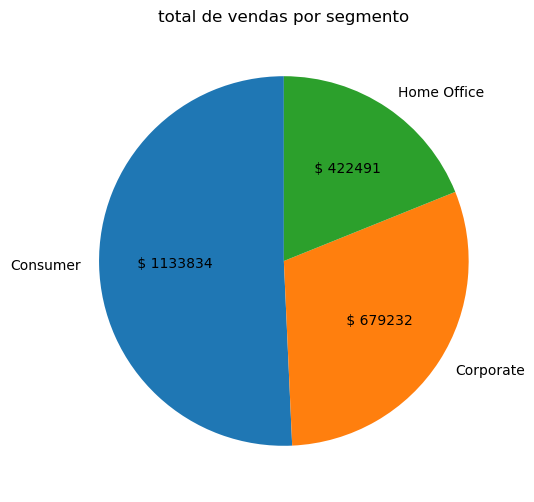

In [17]:
plt.figure(figsize=(16,6))
plt.pie(Segmento_maior_total['Valor_Venda'], labels= Segmento_maior_total['Segmento'], 
        autopct=autopct_format(Segmento_maior_total['Valor_Venda']),
        startangle= 90)
plt.title('total de vendas por segmento')
plt.show()

In [18]:
#Qual o Total de Vendas Por Segmento e Por Ano?
df['ano'] = df['Data_Pedido'].dt.year
df.groupby(['ano','Segmento'])['Valor_Venda'].sum()

ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

In [19]:
"""Os  gestores  da  empresa  estão  considerando
conceder  diferentes  faixas  de  descontos  e
gostariam de fazer uma simulação com base na regra abaixo:
Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
Quantas Vendas Receberiam 15% d
Desconto?"""

df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df['Desconto'].value_counts()


Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [20]:
#Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual
#Seria a Média do Valor de Venda Antes e Depois do Desconto?
df['Valor_Venda_Desconto'] = df['Valor_Venda'] - (df['Valor_Venda'] * df['Desconto'])
vendas_antes = df.loc[df['Desconto'] == 0.15, 'Valor_Venda']
vendas_depois = df.loc[df['Desconto'] == 0.15, 'Valor_Venda_Desconto']


In [21]:
vendas_antes = vendas_antes.mean()
vendas_depois = vendas_depois.mean()
print('media das vendas depois do desconto ', round(vendas_antes, 2))
print('media das vendas antes do desconto ', round(vendas_depois, 2))

media das vendas depois do desconto  2116.81
media das vendas antes do desconto  1799.29


In [22]:
#Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?
#Demonstre o resultado através de gráfico de linha.
df['mes'] = df['Data_Pedido'].dt.month
df_2 = df.groupby(['mes','ano','Segmento'])['Valor_Venda'].agg([np.mean, np.sum, np.median])


C:\Users\natha\AppData\Local\Temp\ipykernel_15400\285183376.py:4: FutureWarning: The provided callable <function mean at 0x0000019D52C90B80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_2 = df.groupby(['mes','ano','Segmento'])['Valor_Venda'].agg([np.mean, np.sum, np.median])
C:\Users\natha\AppData\Local\Temp\ipykernel_15400\285183376.py:4: FutureWarning: The provided callable <function sum at 0x0000019D52C6BA60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_2 = df.groupby(['mes','ano','Segmento'])['Valor_Venda'].agg([np.mean, np.sum, np.median])
C:\Users\natha\AppData\Local\Temp\ipykernel_15400\285183376.py:4: FutureWarning: The provided callable <function median at 0x0000019D52D9AFC0> is currently using SeriesGroupBy.median. In 

<Figure size 1600x600 with 0 Axes>

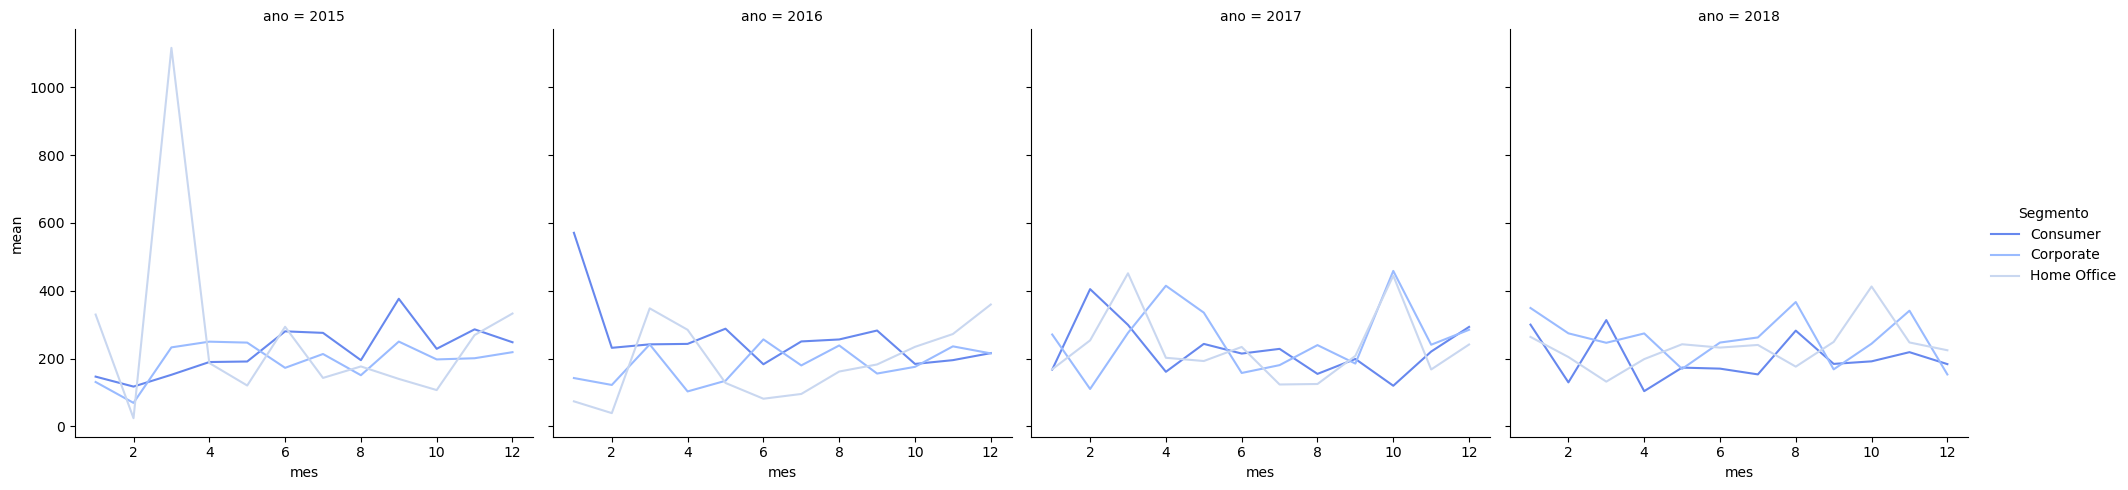

In [23]:
plt.figure(figsize=(16,6))
sea.set_palette('coolwarm')
sea.relplot(kind='line',
            data = df_2,
            y = 'mean',
            x='mes',
            hue= 'Segmento',
            col = 'ano',
            col_wrap= 4)
plt.show()


In [24]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,ano,Desconto,Valor_Venda_Desconto,mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [46]:
#Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?
#Demonstre tudo através de um único gráfico
df_top12 = df.groupby(['Categoria', 'SubCategoria']).sum(numeric_only=True).sort_values(by='Valor_Venda', ascending=False).head(12)
df_top12

Valor_Venda      ano  Desconto  \
Categoria       SubCategoria                                   
Technology      Phones        325271.2940  1748496     90.15   
Furniture       Chairs        317919.6250  1201942     63.30   
Office Supplies Storage       216188.3620  1663791     84.75   
Furniture       Tables        202083.3600   627193     34.15   
Office Supplies Binders       194723.3810  2964618    149.10   
Technology      Machines      189238.6310   231912     13.65   
                Accessories   162791.3620  1504508     76.10   
                Copiers       146248.0940   133104      8.30   
Furniture       Bookcases     108045.0467   449734     23.50   
Office Supplies Appliances    104061.6930   915604     46.45   
Furniture       Furnishings    88862.7700  1865489     92.75   
Office Supplies Paper          76312.7640  2680255    132.90   

                              Valor_Venda_Desconto    mes  
Categoria       SubCategoria                               
Technology      Phones                286990.85830   6649  
Furniture       Chairs                279816.75990   4834  
Office Supplies Storage               191433.27010   6548  
Furniture       Tables                176938.45555   2466  
Office Supplies Binders               169623.33495  11451  
Technology      Machines              162213.65840    897  
                Accessories           144162.61990   5982  
                Copiers               125379.85260    516  
Furniture       Bookcases              95035.86235   1706  
Office Supplies Appliances             91938.64420   3583  
Furniture       Furnishings            79694.54640   7301  
Office Supplies Paper                  68681.48760  10404

In [47]:
df_top12 = df_top12[['Valor_Venda']].astype(int).sort_values(by='Categoria').reset_index()
df_top12

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [49]:
df_top12_cat = df_top12.groupby('Categoria')['Valor_Venda'].sum().reset_index()
df_top12_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


<function matplotlib.pyplot.show(close=None, block=None)>

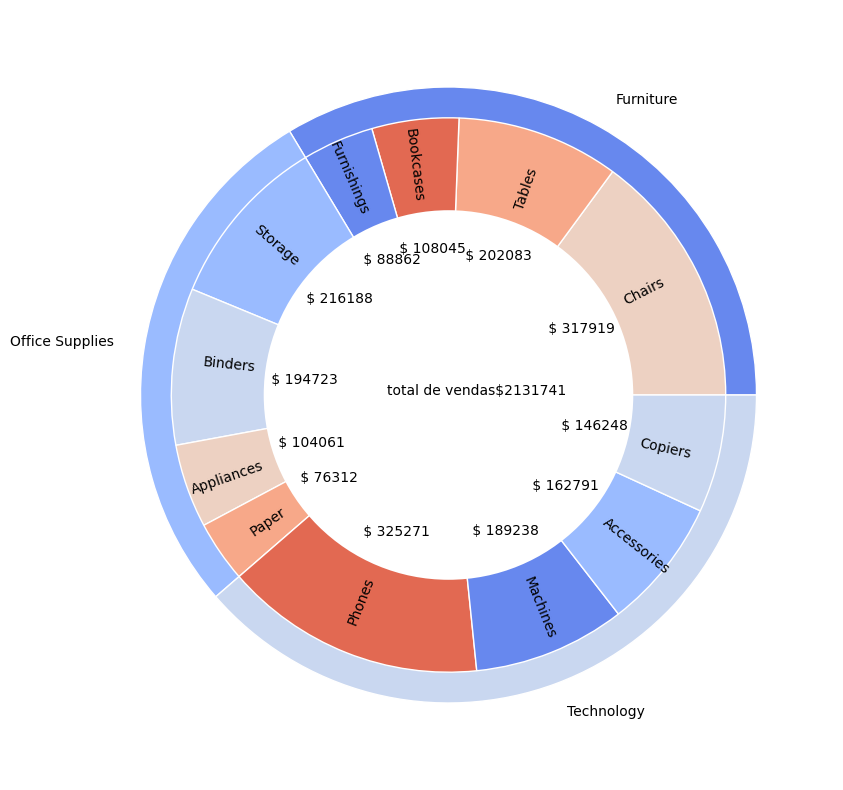

In [51]:

fig, ax = plt.subplots(figsize= (18,10))

p1 = ax.pie(df_top12_cat['Valor_Venda'],
            radius= 1,
            labels= df_top12_cat['Categoria'],
            wedgeprops= dict(edgecolor = 'white'),
            )

p2 = ax.pie(df_top12['Valor_Venda'],
            radius=0.9,
            labels=df_top12['SubCategoria'], 
            autopct= autopct_format(df_top12['Valor_Venda']),
            labeldistance=0.7,
            wedgeprops= dict(edgecolor = 'white'),
            pctdistance= 0.53,
            rotatelabels= True)

centre_circle = plt.Circle((0,0), 0.6, fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'total de vendas' + '$' + str(int(sum(df_top12['Valor_Venda']))), xy = (-0.2, 0))
plt.show
